# Análise preditiva ARIMA

In [2]:
import datetime
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt

data_arima = pd.read_csv("GlobalLandTemperaturesByState.csv")
data_arima.head()
#autocorrelation_plot(data_arima)
#plt.show()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [212]:
#verificação de dada máxima, iremos considerar o mínimo como 1800
print(data_arima['dt'].max())
# Convertendo a coluna "dt" para dados de data
data_arima['dt'] = pd.to_datetime(data_arima['dt'])
#observando análises anteriores foi possível notar que existe uma defasagem nos dados
#anteriores ao ano de 1800
data_arima.drop(data_arima[data_arima['dt']<='1800-01-01'].index, inplace=True)
data_arima.drop(data_arima[data_arima['dt']>='2013-09-01'].index, inplace=True)

# Extraindo o ano da coluna "dt" para realizarmos uma análise por ano
data_arima["year"] = data_arima["dt"].dt.year

## Aqui começa a análise exploratória de dados para descobrir padrões e tendências, primeiro
## agrupando as temperaturas por ano e estado
dados_previsao = data_arima.groupby(["year","State"]).mean()

dados_previsao.head()



2013-09-01


AverageTemperature  AverageTemperatureUncertainty
year State                                                                 
1800 Adygey                        11.061455                       3.109182
     Alabama                       17.971091                       3.117545
     Alberta                             NaN                            NaN
     Andaman And Nicobar           27.349818                       1.793091
     Andhra Pradesh                27.468000                       2.222727

In [186]:
data_arima.drop('Country', axis=1, inplace=True)
data_arima

,dt,AverageTemperature,AverageTemperatureUncertainty,State,year
0,1855-05-01,25.544,1.171,Acre,1855
1,1855-06-01,24.228,1.103,Acre,1855
2,1855-07-01,24.371,1.044,Acre,1855
3,1855-08-01,25.427,1.073,Acre,1855
4,1855-09-01,25.675,1.014,Acre,1855
...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,2013
645670,2013-05-01,21.634,0.578,Zhejiang,2013
645671,2013-06-01,24.679,0.596,Zhejiang,2013
645672,2013-07-01,29.272,1.340,Zhejiang,2013


In [187]:
data_arima.drop('AverageTemperatureUncertainty', axis=1, inplace=True)
data_arima

,dt,AverageTemperature,State,year
0,1855-05-01,25.544,Acre,1855
1,1855-06-01,24.228,Acre,1855
2,1855-07-01,24.371,Acre,1855
3,1855-08-01,25.427,Acre,1855
4,1855-09-01,25.675,Acre,1855
...,...,...,...,...
645669,2013-04-01,15.710,Zhejiang,2013
645670,2013-05-01,21.634,Zhejiang,2013
645671,2013-06-01,24.679,Zhejiang,2013
645672,2013-07-01,29.272,Zhejiang,2013


In [193]:
data_arima.drop(data_arima[data_arima['State']!='Bahia'].index, inplace=True)

In [194]:
data_arima

,dt,AverageTemperature,State,year
50081,1832-01-01,24.522,Bahia,1832
50082,1832-02-01,24.477,Bahia,1832
50083,1832-03-01,24.264,Bahia,1832
50084,1832-04-01,23.383,Bahia,1832
50085,1832-05-01,22.548,Bahia,1832
...,...,...,...,...
52256,2013-04-01,25.542,Bahia,2013
52257,2013-05-01,24.843,Bahia,2013
52258,2013-06-01,23.998,Bahia,2013
52259,2013-07-01,23.554,Bahia,2013


In [ ]:
## Vamos verificar quais estados podemos checar dentro desse conjunto de dados
estados1 = data_arima['State'].unique()
print(estados1)

In [196]:
data_arima.drop('State', axis=1, inplace=True)
data_arima

,dt,AverageTemperature,year
50081,1832-01-01,24.522,1832
50082,1832-02-01,24.477,1832
50083,1832-03-01,24.264,1832
50084,1832-04-01,23.383,1832
50085,1832-05-01,22.548,1832
...,...,...,...
52256,2013-04-01,25.542,2013
52257,2013-05-01,24.843,2013
52258,2013-06-01,23.998,2013
52259,2013-07-01,23.554,2013


In [206]:
data_arima.columns

Index(['AverageTemperature', 'year'], dtype='object')

In [207]:
import seaborn as sns

sns.set()

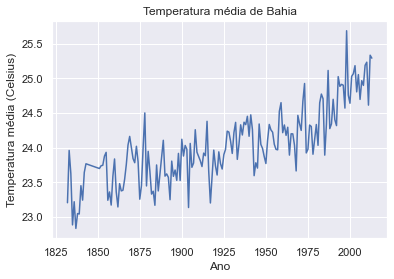

In [208]:
dados_local = dados_agrupados.loc[(slice(None), 'Bahia'), :]
dados_local = dados_local.reset_index(level=0)

plt.plot(dados_local["year"], dados_local["AverageTemperature"])
plt.xlabel("Ano")
plt.ylabel("Temperatura média (Celsius)")
plt.title("Temperatura média de "+ 'Bahia')
plt.show()

In [210]:
train = data_arima[data_arima.index < pd.to_datetime("2000-01-01", format='%Y-%m-%d')]
test = data_arima[data_arima.index < pd.to_datetime("2013-09-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('AverageTemperature')
plt.xlabel('Dt')
plt.xticks(rotation=45)
plt.title("Train/Test split for AverageTemperature")
plt.show()

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'Timestamp'